# Data

We'll use weather data to talk about several methods of using the data, some are packages out of `pypi` and others are builtin. The builtin packages tend to be designed to handle smaller amounts of data.

We'll start with data from a weather station in the Capitol hill area of Seattle. Take a look at the `3235995.csv` file. I extracted this from [NOAA](www.ncdc.noaa.gov/) (using instructions found in your book).

First, lets load it up with the normal `csv` package. Use `help(csv)` after you've `import csv` to get some brief help on the package.

Here we will load the file, taken straight from our book:

In [1]:
import csv

with open('3235995.csv', newline='') as f:
    reader = csv.reader(f)
    header = reader.__next__()
    print(header)

['STATION', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']


Note each call to `__next__()` grabs the next item. Lets read 5 lines using some trickery and the `enumerate` function for a `for` loop:

In [2]:
with open('3235995.csv', newline='') as f:
    reader = csv.reader(f)
    header = reader.__next__()
    print(header)
    for index, row in enumerate(reader):
        if index < 5:
            print(row)
        else:
            break

['STATION', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']
['US1WAKG0225', '2017-09-25', '', '', '0.01', '', '', '', '']
['US1WAKG0225', '2017-09-26', '', '', '0.00', '', '', '', '']
['US1WAKG0225', '2017-09-27', '', '', '0.00', '', '', '', '']
['US1WAKG0225', '2017-09-28', '', '', '0.00', '', '', '', '']
['US1WAKG0225', '2017-09-29', '', '', '0.00', '', '', '', '']


As an aside, the `__next__` function is what python uses to iterate over any iterable object - like a list or a tuple or anything else similar. If you create you own object with a `__next__` function, then it can also participate in `for` loops, list comprehensions, generator expressions, etc.

Now - lets get 1000 entries in the `PRCP` (precipitation) into a single list, `measurements`, which we will then plot.

['STATION', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD', 'WESF']
1000


Next, lets make a simple plot of them. We need to think a second of what we want. We want a trend line - as a function of time. We won't do date just yet - lets start with just doing sequence number.

This is just a scatter plot, with `(x,y)` being `(sequence number, precipitation)`. We use `matplotlib`, *the* plotting library for python and `jupyter` notebooks, for this - and its `scatter` function.

Text(0, 0.5, 'Precipitation (in)')

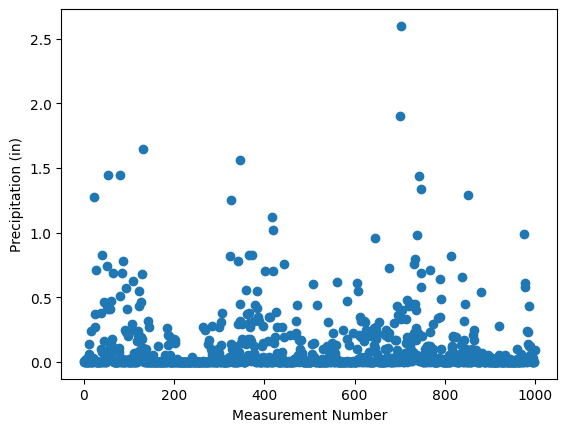

In [4]:
from matplotlib import pyplot as plt

plt.scatter(list(range(0, 1000)), measurements)
plt.xlabel('Measurement Number')
plt.ylabel('Precipitation (in)')

Ok - we can already see patterns! While the data contains three years, we've only pulled in about 3or 4 years here.

## Using `pandas`

Pandas is _the way_ to manipulate square data in the python data science eco-system. There are courses taught on this. We are going to go through some very simple stuff here.

First, lets read in the whole sample. Note the integration with Jupyter and how it will pretty print!

In [5]:
import pandas as pd

df = pd.read_csv('3235995.csv')
df

,STATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,2017-09-25,NaN,NaN,0.01,NaN,NaN,NaN,NaN
1,US1WAKG0225,2017-09-26,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,2017-09-27,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,2017-09-28,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,2017-09-29,NaN,NaN,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1785,US1WAKG0225,2023-02-09,NaN,NaN,0.00,0.0,NaN,NaN,NaN
1786,US1WAKG0225,2023-02-10,NaN,NaN,0.08,NaN,NaN,NaN,NaN
1787,US1WAKG0225,2023-02-11,NaN,NaN,0.00,0.0,NaN,NaN,NaN
1788,US1WAKG0225,2023-02-12,NaN,NaN,0.00,0.0,NaN,NaN,NaN


An amazingly useful, but simple, thing is to look at the list of columns. I'll place this here just for reference...

In [6]:
df.columns

Index(['STATION', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'WESD',
       'WESF'],
      dtype='object')

Notes:

* The `NaN` are missing (if you look back at our 5 line read-in you'll note they are empty strings) - this forces you to make explicit decisions about missing data, rather than assuming they are zeros. A lesson the whole community learned, repeatedly, the hard way.
* The column names are things you can actually reference in the data frame - so titles are important, and spaces aren't great.

Lets make the same plot as we did previously.

Note how we can reference the `PRCP` column as `df.PRCP`. You can also do `df['PRCP']` as well. You can even index it by a column number.

Text(0, 0.5, 'Precipitation (in)')

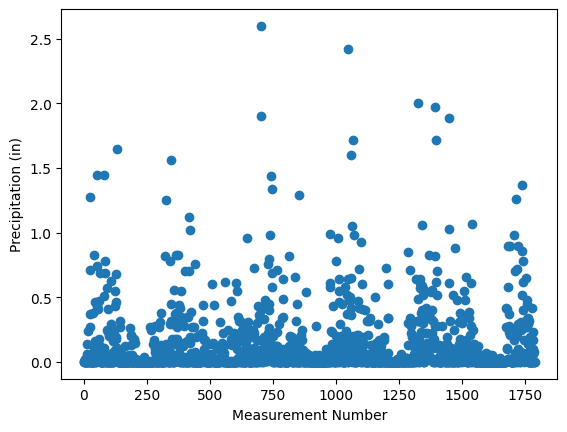

In [7]:
plt.scatter(list(range(0, len(df))), df.PRCP)
plt.xlabel('Measurement Number')
plt.ylabel('Precipitation (in)')

OK - great - can we do anything with the months to try to bring this trend out further?

They say you spend most of your time in data science work cleaning your data. It is no different in science. Getting good, well understood, data often feels like 80% of the battle getting to a good result.

Here, first, we need the `DATE` column to be a data object that we can manipulate as a date.

In [8]:
df.dtypes

STATION     object
DATE        object
DAPR       float64
MDPR       float64
PRCP       float64
SNOW       float64
SNWD       float64
WESD       float64
WESF       float64
dtype: object

It is basically a string here (and `object`). We want to change it to a date. This is pretty common, so `pandas` has a function to help us. But there are lots of ways to accomplish this.

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

STATION            object
DATE       datetime64[ns]
DAPR              float64
MDPR              float64
PRCP              float64
SNOW              float64
SNWD              float64
WESD              float64
WESF              float64
dtype: object

Now we can do things like asking for summaries as a function of year, month, and even day. We do this by creating a new column that splits the components of the date out:

In [10]:
df['year'] = df['DATE'].apply(lambda x: x.year)
df['month'] = df['DATE'].apply(lambda x: x.month)
df['day'] = df['DATE'].apply(lambda x: x.day)
df

,STATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF,year,month,day
0,US1WAKG0225,2017-09-25,NaN,NaN,0.01,NaN,NaN,NaN,NaN,2017,9,25
1,US1WAKG0225,2017-09-26,NaN,NaN,0.00,NaN,NaN,NaN,NaN,2017,9,26
2,US1WAKG0225,2017-09-27,NaN,NaN,0.00,NaN,NaN,NaN,NaN,2017,9,27
3,US1WAKG0225,2017-09-28,NaN,NaN,0.00,NaN,NaN,NaN,NaN,2017,9,28
4,US1WAKG0225,2017-09-29,NaN,NaN,0.00,NaN,NaN,NaN,NaN,2017,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...
1785,US1WAKG0225,2023-02-09,NaN,NaN,0.00,0.0,NaN,NaN,NaN,2023,2,9
1786,US1WAKG0225,2023-02-10,NaN,NaN,0.08,NaN,NaN,NaN,NaN,2023,2,10
1787,US1WAKG0225,2023-02-11,NaN,NaN,0.00,0.0,NaN,NaN,NaN,2023,2,11
1788,US1WAKG0225,2023-02-12,NaN,NaN,0.00,0.0,NaN,NaN,NaN,2023,2,12


Now we can take all the measurements for a year and sum them, and then get a yearly rainfall report:

In [11]:
by_year = df.groupby('year')['PRCP'].sum()
by_year

year
2017    14.25
2018    25.57
2019    32.43
2020    40.36
2021    42.04
2022    42.59
2023     5.40
Name: PRCP, dtype: float64

And make a plot of it

<Axes: xlabel='year'>

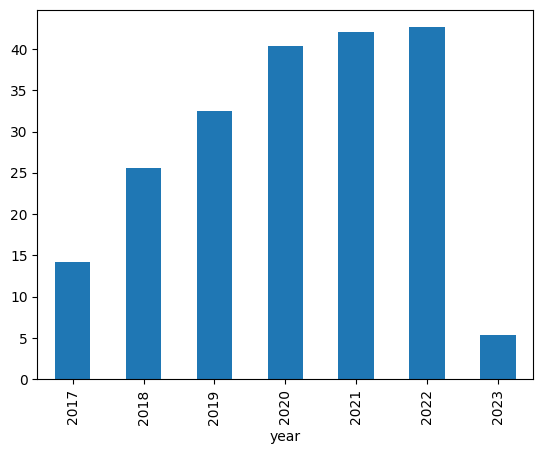

In [12]:
by_year.plot.bar()

## Seaborn

Just to give you a quick example of some of the crazy visualizations you can do, lets look at the rain fall by month. We'll use a very nice, and very opinionated, plot library called `seaborn`.

In [13]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00


Lets make a plot of accumulation per month, with the years on top of each other so we can see the general trend.

1. Group the data by month and year - so we get a sum for each one.
   * We have to `reset_index` here because otherwise we get a crash - `pandas` tries to be clever and `seaborn` can't deal with it being clever.
1. Use `seaborn` to make a nice plot of the data for each year, but on an axis that is the month.

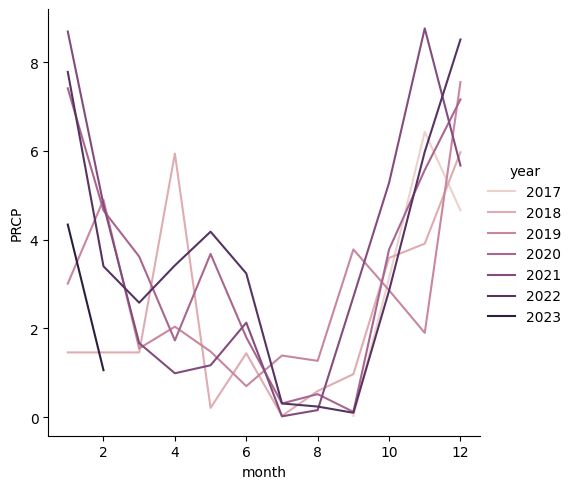

In [14]:
import seaborn as sns
by_month = df.groupby(['year', 'month'])['PRCP'].sum().reset_index()
sns.relplot(x='month', y='PRCP', data=by_month, hue="year", kind="line")